In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [3]:
df = pd.read_csv("D:\IIT B\Sem 3\GNR 627\Course Project\Data Set\Final_Dataset_Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,sales_success
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,0
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,0
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,0


In [5]:
bike_data = df

In [6]:
# Assuming 'sales_success' is the column you want to predict
X = bike_data[['price', 'kms_driven', 'owner', 'age', 'power']]
y = bike_data['sales_success']
# Convert categorical variables to numerical using one-hot encoding or label encoding
# For simplicity, let's assume 'owner' is a categorical variable
X = pd.get_dummies(X, columns=['owner'], drop_first=True)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
model = GaussianNB()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.37%


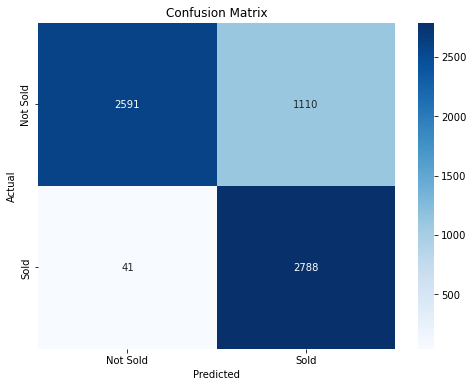

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82      3701
           1       0.72      0.99      0.83      2829

    accuracy                           0.82      6530
   macro avg       0.85      0.84      0.82      6530
weighted avg       0.87      0.82      0.82      6530



In [7]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sold', 'Sold'], yticklabels=['Not Sold', 'Sold'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

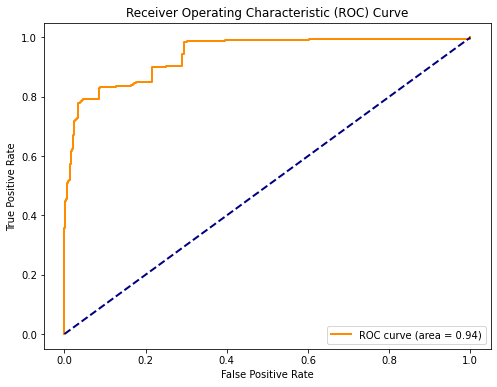

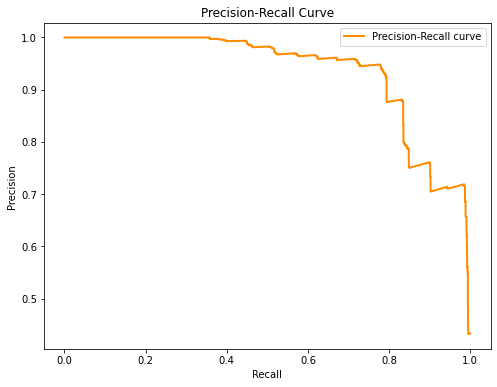

In [8]:
# Make predictions on the testing set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Mean Squared Error: 0.00


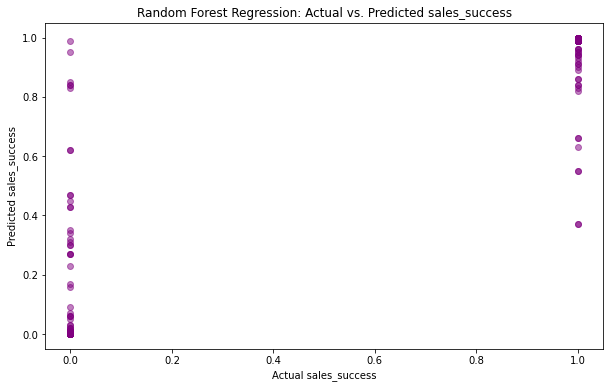

In [12]:
# Random Forest Regression model
# Assuming 'price' is the target variable you want to predict
X = bike_data[['price', 'kms_driven', 'owner', 'age', 'power']]
y = bike_data['sales_success']
# Convert categorical variables to numerical using one-hot encoding or label encoding
# For simplicity, let's assume 'owner' is a categorical variable
X = pd.get_dummies(X, columns=['owner'], drop_first=True)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel('Actual sales_success')
plt.ylabel('Predicted sales_success')
plt.title('Random Forest Regression: Actual vs. Predicted sales_success')
plt.show()

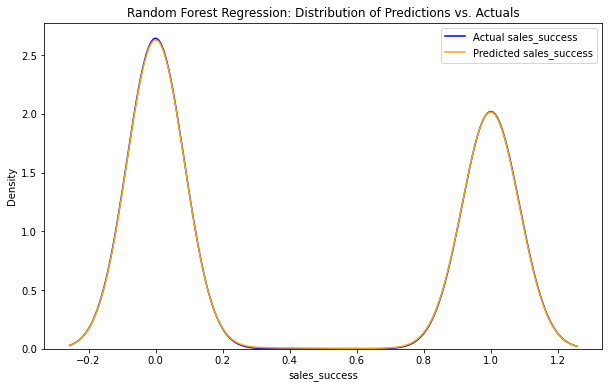

In [13]:
# Plot the distribution of actual prices and predicted prices
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual sales_success', color='blue')
sns.kdeplot(y_pred, label='Predicted sales_success', color='orange')
plt.xlabel('sales_success')
plt.ylabel('Density')
plt.title('Random Forest Regression: Distribution of Predictions vs. Actuals')
plt.legend()
plt.show()

In [14]:
bike_data = bike_data[bike_data['sales_success'] != 0]
bike_data.reset_index(drop=True, inplace=True)
print(bike_data.head())

                             bike_name  price       city  kms_driven  \
0   TVS Star City Plus Dual Tone 110cc  35000  Ahmedabad       17654   
1                     Yamaha FZs 150cc  53499      Delhi       25000   
2  Hero Splendor Plus Self Alloy 100cc  45000      Delhi       12645   
3                  Bajaj Discover 100M  29499      Delhi       20000   
4                  Bajaj Discover 125M  29900      Delhi       20000   

         owner  age  power   brand  sales_success  
0  First Owner    3    110     TVS              1  
1  First Owner    6    150  Yamaha              1  
2  First Owner    3    100    Hero              1  
3  First Owner    8    100   Bajaj              1  
4  First Owner    7    125   Bajaj              1  


In [15]:
brand_price_ranges = bike_data.groupby('brand')['price'].describe()
# Print the price ranges for each brand
print("\nPrice ranges for each brand:")
print(brand_price_ranges[['min', 'max']])


Price ranges for each brand:
                       min        max
brand                                
BMW              1350000.0  1800000.0
Bajaj               8000.0    65000.0
Benelli           785000.0   785000.0
Ducati            800000.0  1500000.0
Harley-Davidson   780000.0  1100000.0
Hero               10000.0    62000.0
Honda              15000.0   800000.0
Indian           1900000.0  1900000.0
KTM                55000.0   860000.0
Kawasaki          830000.0  1100000.0
MV                950000.0  1500000.0
Mahindra           17800.0    41000.0
Royal Enfield      45000.0    67000.0
Suzuki             21600.0  1260000.0
TVS                 5800.0    65000.0
Triumph           789000.0  1300000.0
Yamaha             14000.0  1550000.0


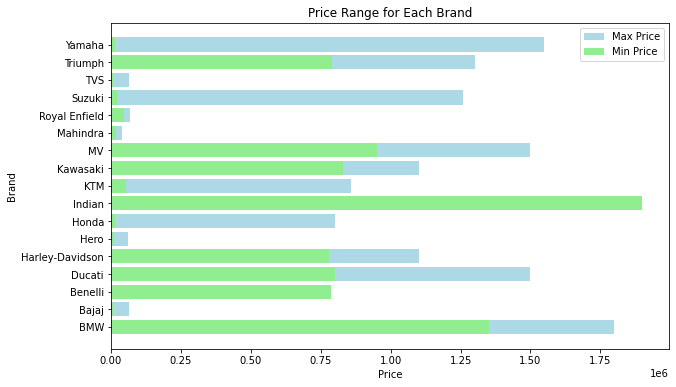

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(brand_price_ranges.index, brand_price_ranges['max'], color='lightblue', label='Max Price')
plt.barh(brand_price_ranges.index, brand_price_ranges['min'], color='lightgreen', label='Min Price')
plt.xlabel('Price')
plt.ylabel('Brand')
plt.title('Price Range for Each Brand')
plt.legend()
plt.show()

In [17]:
city_price_ranges = bike_data.groupby('city')['price'].agg(['min', 'max'])
# Print the max and min price range for each city
print("Max and Min Price Range for Each City:")
print(city_price_ranges)

Max and Min Price Range for Each City:
                 min    max
city                       
24 Pargana     36000  65000
Adalaj         16900  40000
Agra           15000  60000
Ahmedabad      10000  65000
Ahmednagar     23000  56000
...              ...    ...
Virudhunagar   45500  45500
Visakhapatnam  21100  62000
Wardha         42000  45000
Yamuna Nagar   30000  30000
Yemmiganur     47000  47000

[247 rows x 2 columns]


In [18]:
brand_city_preference = bike_data.groupby(['city', 'brand'])['price'].mean().reset_index()

# Find the most preferred brand for each city based on average price
preferred_brands = brand_city_preference.loc[brand_city_preference.groupby('city')['price'].idxmin()]

# Print the result
print("Most Preferred Brand for Each City:")
print(preferred_brands[['city', 'brand', 'price']])

Most Preferred Brand for Each City:
              city   brand    price
0       24 Pargana   Bajaj  41500.0
3           Adalaj   Bajaj  16900.0
5             Agra   Bajaj  20000.0
8        Ahmedabad    Hero  32018.1
16      Ahmednagar    Hero  29750.0
..             ...     ...      ...
511   Virudhunagar   Bajaj  45500.0
513  Visakhapatnam    Hero  21100.0
514         Wardha    Hero  43000.0
515   Yamuna Nagar   Bajaj  30000.0
516     Yemmiganur  Yamaha  47000.0

[247 rows x 3 columns]


In [21]:
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim

def get_city_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_coordinates_scraper")
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None

def scrape_city_coordinates():
    # URL of the Wikipedia page containing the list of cities
    wiki_url = "https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population"

    # Send a GET request to the URL
    response = requests.get(wiki_url)

    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the list of cities
    city_table = soup.find('table', {'class': 'wikitable'})

    # Extract city names from the table
    city_names = [row.find_all('td')[1].text.strip() for row in city_table.find_all('tr')[1:]]

    # Get coordinates for each city
    city_coordinates = []
    for city_name in city_names:
        coordinates = get_city_coordinates(city_name)
        if coordinates:
            city_coordinates.append({'city': city_name, 'latitude': coordinates[0], 'longitude': coordinates[1]})

    return city_coordinates

# Run the scraper and save the result to a CSV file
city_coordinates_data = scrape_city_coordinates()
city_coordinates_df = pd.DataFrame(city_coordinates_data)
city_coordinates_df.to_csv('city_coordinates.csv', index=False)

print("City coordinates dataset has been saved to 'city_coordinates.csv'.")


City coordinates dataset has been saved to 'city_coordinates.csv'.


In [22]:
city_coordinates = pd.read_csv('city_coordinates.csv')

In [23]:
print(city_coordinates.head())

        city   latitude  longitude
0     Mumbai  19.078545  72.878176
1      Delhi  28.627393  77.171695
2  Bangalore  12.976794  77.590082
3  Hyderabad  17.360589  78.474061
4  Ahmedabad  23.021624  72.579707


In [24]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load your dataset with city coordinates
# Assuming your dataset is stored in a CSV file named 'city_coordinates.csv'
city_coordinates = pd.read_csv('city_coordinates.csv')

# Assuming 'brand', 'city', and 'price' are the relevant columns
# Replace 'brand', 'city', and 'price' with the actual column names in your dataset
brand_city_preference = bike_data.groupby(['city', 'brand'])['price'].mean().reset_index()

# Find the most preferred brand for each city based on average price
preferred_brands = brand_city_preference.loc[brand_city_preference.groupby('city')['price'].idxmin()]

# Merge with city_coordinates to get geographical coordinates
preferred_brands = pd.merge(preferred_brands, city_coordinates, on='city', how='left')

# Check for NaN values in the dataset
nan_check = preferred_brands.isna().any(axis=1)

# Drop rows with NaN values
preferred_brands_cleaned = preferred_brands[~nan_check]

# Create a folium map centered around India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each city with the most preferred brand and valid coordinates
marker_cluster = MarkerCluster().add_to(india_map)

for index, row in preferred_brands_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['city']} - Preferred Brand: {row['brand']}",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map as an HTML file
india_map.save('preferred_brands_map.html')

india_map

In [25]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load your dataset with city coordinates
# Assuming your dataset is stored in a CSV file named 'city_coordinates.csv'
city_coordinates = pd.read_csv('city_coordinates.csv')

# Assuming 'brand', 'city', and 'price' are the relevant columns
# Replace 'brand', 'city', and 'price' with the actual column names in your dataset
brand_city_preference = bike_data.groupby(['city', 'brand'])['price'].mean().reset_index()

# Find the most preferred brand for each city based on average price
preferred_brands = brand_city_preference.loc[brand_city_preference.groupby('city')['price'].idxmin()]

# Merge with city_coordinates to get geographical coordinates
preferred_brands = pd.merge(preferred_brands, city_coordinates, on='city', how='left')

# Check for NaN values in the dataset
nan_check = preferred_brands.isna().any(axis=1)

# Drop rows with NaN values
preferred_brands_cleaned = preferred_brands[~nan_check]

# Create a folium map centered around India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each city with the most preferred brand and valid coordinates
marker_cluster = MarkerCluster().add_to(india_map)

for index, row in preferred_brands_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['city']} - Preferred Brand: {row['brand']}",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map as an HTML file
india_map.save('preferred_brands_map.html')

display(india_map)